In [3]:

import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns
import collections
import operator
%matplotlib  

Using matplotlib backend: Qt5Agg


In [4]:
G2=nx.duplication_divergence_graph(100, 0.5, seed=None)

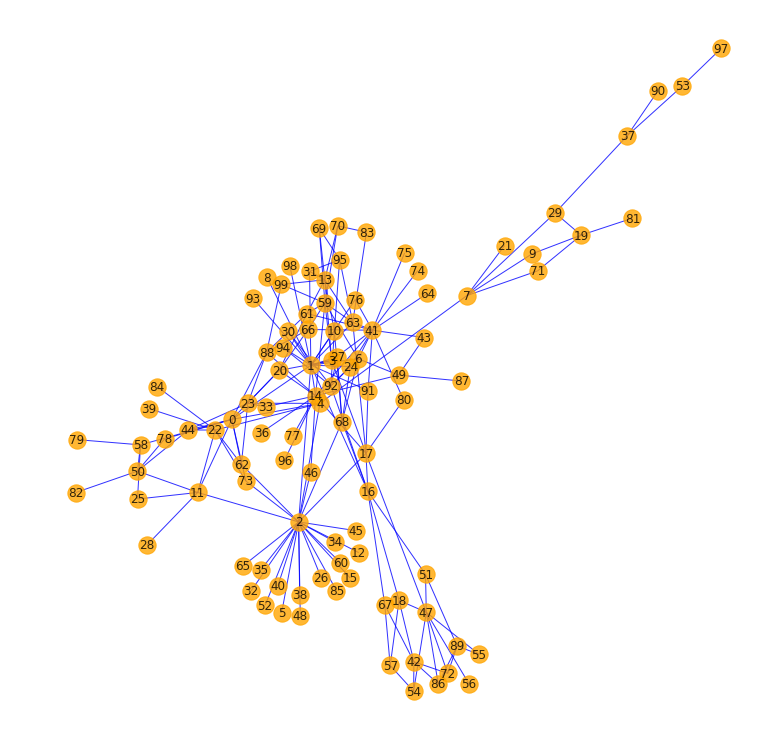

In [3]:

plt.figure(figsize=(10,10))
nx.draw(G2, alpha=0.8, edge_color='blue', node_color='orange',with_labels=True)


In [5]:
def calculate_measure(G2):
    print(nx.info(G2))

    betweenness = nx.betweenness_centrality(G2, normalized=True).values() 
    closeness = nx.closeness_centrality(G2).values()
    
    print("Number of isolated nodes: ", nx.number_of_isolates(G2))

    if G2.is_directed():
        calc_measure_dir(G2)
    else:
        giant_component= sorted(nx.connected_component_subgraphs(G2), key = len, reverse=True)
        print("Size of biggest GCC (nodes, edges):", giant_component[0].order(), giant_component[0].size())
        
    print("Max betweeness centrality: ", np.max(np.array(list(betweenness))))
    print("Average betweenness centrality", np.mean(np.array(list(betweenness))))
    print("Average closeness centrality", np.mean(np.array(list(closeness))))
    print("Max closeness centrality: ", np.max(np.array(list(closeness))))
    print("Average clustering", nx.average_clustering(G2.to_undirected()))
    print("Assortativity measures: \n Coeff: ", nx.degree_assortativity_coefficient(G2))  
    
  

In [24]:
calculate_measure(G2)
print(nx.diameter(G2) )

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 220
Average degree:   4.4000
Number of isolated nodes:  0
Size of biggest GCC (nodes, edges): 100 220
Max betweeness centrality:  0.20612646055546643
Average betweenness centrality 0.022255205112347968
Average closeness centrality 0.32125790192131726
Max closeness centrality:  0.43805309734513276
Average clustering 0.04591250416250416
Assortativity measures: 
 Coeff:  -0.07174306110646778
7


In [19]:
p_new_connection = 1
p_remove_connection =1 

In [20]:


def add_and_remove_edges(G2, p_new_connection, p_remove_connection):    
    '''    
    for each node,    
      add a new connection to random other node, with prob p_new_connection,    
      remove a connection, with prob p_remove_connection    

    operates on G in-place    
    '''                
    new_edges = []    
    rem_edges = []    

    for node in G2.nodes():    
        # find the other nodes this one is connected to    
        connected = [to for (fr, to) in G2.edges(node)]    
        # and find the remainder of nodes, which are candidates for new edges   
        unconnected = [n for n in G2.nodes() if not n in connected]    

        # probabilistically add a random edge    
        if len(unconnected): # only try if new edge is possible    
            if random.random() < p_new_connection:    
                new = random.choice(unconnected)    
                G2.add_edge(node, new)    
                print ("\tnew edge:\t {} -- {}".format(node, new))    
                new_edges.append( (node, new) )    
                # book-keeping, in case both add and remove done in same cycle  
                unconnected.remove(new)    
                connected.append(new)    

        # probabilistically remove a random edge    
        if len(connected): # only try if an edge exists to remove    
            if random.random() < p_remove_connection:    
                remove = random.choice(connected)    
                G2.remove_edge(node, remove)    
                print ("\tedge removed:\t {} -- {}".format(node, remove))    
                rem_edges.append( (node, remove) )    
                # book-keeping, in case lists are important later?    
                connected.remove(remove)    
                unconnected.append(remove)    
    return rem_edges, new_edges 

rem_edges, new_edges = add_and_remove_edges(G2, p_new_connection, p_remove_connection)

	new edge:	 0 -- 91
	edge removed:	 0 -- 15
	new edge:	 1 -- 5
	edge removed:	 1 -- 12
	new edge:	 2 -- 17
	edge removed:	 2 -- 11
	new edge:	 3 -- 44
	edge removed:	 3 -- 44
	new edge:	 4 -- 57
	edge removed:	 4 -- 55
	new edge:	 5 -- 90
	edge removed:	 5 -- 78
	new edge:	 6 -- 17
	edge removed:	 6 -- 37
	new edge:	 7 -- 60
	edge removed:	 7 -- 60
	new edge:	 8 -- 90
	edge removed:	 8 -- 37
	new edge:	 9 -- 15
	edge removed:	 9 -- 1
	new edge:	 10 -- 9
	edge removed:	 10 -- 20
	new edge:	 11 -- 49
	edge removed:	 11 -- 90
	new edge:	 12 -- 17
	edge removed:	 12 -- 14
	new edge:	 13 -- 93
	edge removed:	 13 -- 65
	new edge:	 14 -- 29
	edge removed:	 14 -- 29
	new edge:	 15 -- 31
	edge removed:	 15 -- 31
	new edge:	 16 -- 81
	edge removed:	 16 -- 5
	new edge:	 17 -- 78
	edge removed:	 17 -- 34
	new edge:	 18 -- 13
	edge removed:	 18 -- 21
	new edge:	 19 -- 71
	edge removed:	 19 -- 17
	new edge:	 20 -- 13
	edge removed:	 20 -- 62
	new edge:	 21 -- 43
	edge removed:	 21 -- 43
	new edge:	 

In [22]:

ebunch= [(82,93),(52,64),(38,67),(5,79),(82,1),(52,3),(38,4),(5,9)]
G2.add_edges_from(ebunch)

calculate_measure(G2) # 5 %
print(nx.diameter(G2) ) 


Name: 
Type: Graph
Number of nodes: 100
Number of edges: 180
Average degree:   3.6000
Number of isolated nodes:  0
Size of biggest GCC (nodes, edges): 100 180
Max betweeness centrality:  0.19908384576395377
Average betweenness centrality 0.028074623788909507
Average closeness centrality 0.2763441264741494
Max closeness centrality:  0.3944223107569721
Average clustering 0.050009657009657
Assortativity measures: 
 Coeff:  -0.04660278745644681
11


In [29]:

ebunch1= [(56,67),(77,96),(56,1)] 
G2.add_edges_from(ebunch1)

calculate_measure(G2) #10%
print(nx.diameter(G2) )


Name: 
Type: Graph
Number of nodes: 100
Number of edges: 189
Average degree:   3.7800
Number of isolated nodes:  0
Size of biggest GCC (nodes, edges): 100 189
Max betweeness centrality:  0.2666307592765749
Average betweenness centrality 0.02619872191300763
Average closeness centrality 0.2887835580440566
Max closeness centrality:  0.4267241379310345
Average clustering 0.07857004107004105
Assortativity measures: 
 Coeff:  -0.019847655830919277
9


In [40]:
ebunch2= [(82,60),(35,96),(19,60),(52,64),(52,1),(52,3),(38,4),(5,9),(96,82),(82,1)]
G2.add_edges_from(ebunch2)
calculate_measure(G2) 

print(nx.diameter(G2) )

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 199
Average degree:   3.9800
Number of isolated nodes:  0
Size of biggest GCC (nodes, edges): 100 199
Max betweeness centrality:  0.27953947590182476
Average betweenness centrality 0.024456813028241604
Average closeness centrality 0.3021374605477798
Max closeness centrality:  0.4479638009049774
Average clustering 0.03813575150339857
Assortativity measures: 
 Coeff:  0.007508277590609694
7


In [49]:
ebunch3= [(36,12),(12,96),(38,96),(79,12),(12,1)]
G2.add_edges_from(ebunch3)
calculate_measure(G2) 


Name: 
Type: Graph
Number of nodes: 100
Number of edges: 204
Average degree:   4.0800
Number of isolated nodes:  0
Size of biggest GCC (nodes, edges): 100 204
Max betweeness centrality:  0.26510443920316945
Average betweenness centrality 0.023411667697381983
Average closeness centrality 0.3103250098286517
Max closeness centrality:  0.4541284403669725
Average clustering 0.05297430347430347
Assortativity measures: 
 Coeff:  -0.024716922895877222


In [51]:
G2.node[10] # H0 queary returns labels of  node


{}

In [53]:
G2.degree(10) # H1 queary returns degree of specified node 


5

In [55]:
list(G2.degree((G2.neighbors(10)) )  ) # H2 returns the degrees of node neighbors
    

[(1, 15), (47, 12), (50, 7), (74, 2), (80, 1)]

In [57]:
list(nx.bfs_edges(G2, 10)) 

[(10, 1),
 (10, 47),
 (10, 50),
 (10, 74),
 (10, 80),
 (1, 0),
 (1, 2),
 (1, 3),
 (1, 6),
 (1, 14),
 (1, 16),
 (1, 24),
 (1, 30),
 (1, 63),
 (1, 41),
 (1, 56),
 (1, 82),
 (1, 20),
 (1, 12),
 (47, 17),
 (47, 51),
 (47, 54),
 (47, 72),
 (47, 86),
 (47, 85),
 (47, 62),
 (47, 27),
 (47, 21),
 (47, 25),
 (47, 32),
 (50, 11),
 (50, 44),
 (50, 95),
 (50, 77),
 (50, 69),
 (74, 55),
 (0, 4),
 (0, 42),
 (0, 83),
 (0, 15),
 (2, 45),
 (2, 46),
 (2, 37),
 (2, 88),
 (2, 76),
 (2, 18),
 (2, 22),
 (2, 39),
 (3, 13),
 (3, 59),
 (3, 84),
 (3, 52),
 (6, 87),
 (6, 60),
 (14, 33),
 (14, 49),
 (14, 92),
 (14, 78),
 (16, 68),
 (16, 48),
 (16, 8),
 (24, 71),
 (30, 91),
 (63, 70),
 (41, 61),
 (41, 43),
 (41, 90),
 (56, 97),
 (20, 23),
 (20, 67),
 (12, 36),
 (12, 96),
 (12, 79),
 (51, 34),
 (72, 99),
 (86, 89),
 (86, 7),
 (86, 66),
 (86, 81),
 (85, 9),
 (85, 75),
 (85, 93),
 (11, 28),
 (95, 31),
 (15, 73),
 (88, 94),
 (22, 57),
 (59, 26),
 (84, 53),
 (52, 64),
 (60, 19),
 (33, 65),
 (92, 98),
 (68, 29),
 (8, 5)

In [63]:
def neighbors(G2, n):
 
 return list(G2.neighbors(4))
print(" neighbours = ", neighbors(G2,'24')) 

 neighbours =  [0, 69, 9]


In [69]:
nl = [ n[1] for n in G2.edges(12) ]

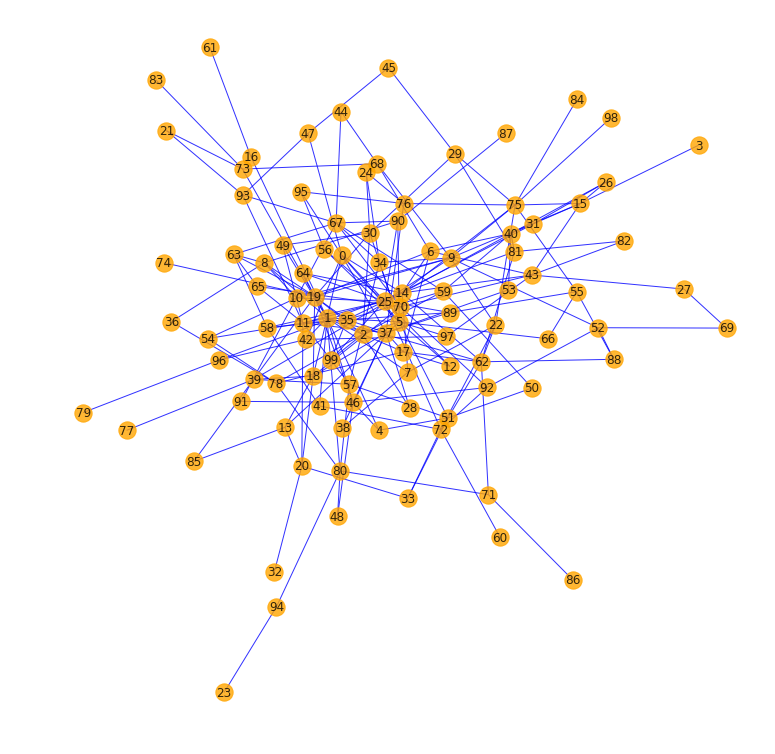

In [23]:
ebunch8 = [(16,61),(1,16)] 
G2.add_edges_from(ebunch8)
plt.figure(figsize=(10,10))
nx.draw(G2, alpha=0.8, edge_color='blue', node_color='orange',with_labels=True)
